## Tutorial 9 
Tom Carron,
Clara Kretzschmar, 
& Timon Danowski

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from ex9 import *
matplotlib.rcParams["figure.dpi"]=200

In [8]:
N = 200
a, b = 0, 1 # Domain size
shock_loc = 0.5 #Shock location
'''
1: Left of the shock
2: right of the shock
'''
density_1, density_2 = 1, 0.125
pressure_1, pressure_2 = 1, 0.1
momentum_1, momentum_2 = 0, 0
t_max = 0.2
gamma = 1.4

# w = [rho, vx, vy, vz, p]
w_1 = [density_1, momentum_1, momentum_1, momentum_1, pressure_1]
w_2 = [density_2, momentum_2, momentum_2, momentum_2, pressure_2]
run_N=200

## Initial sod shock

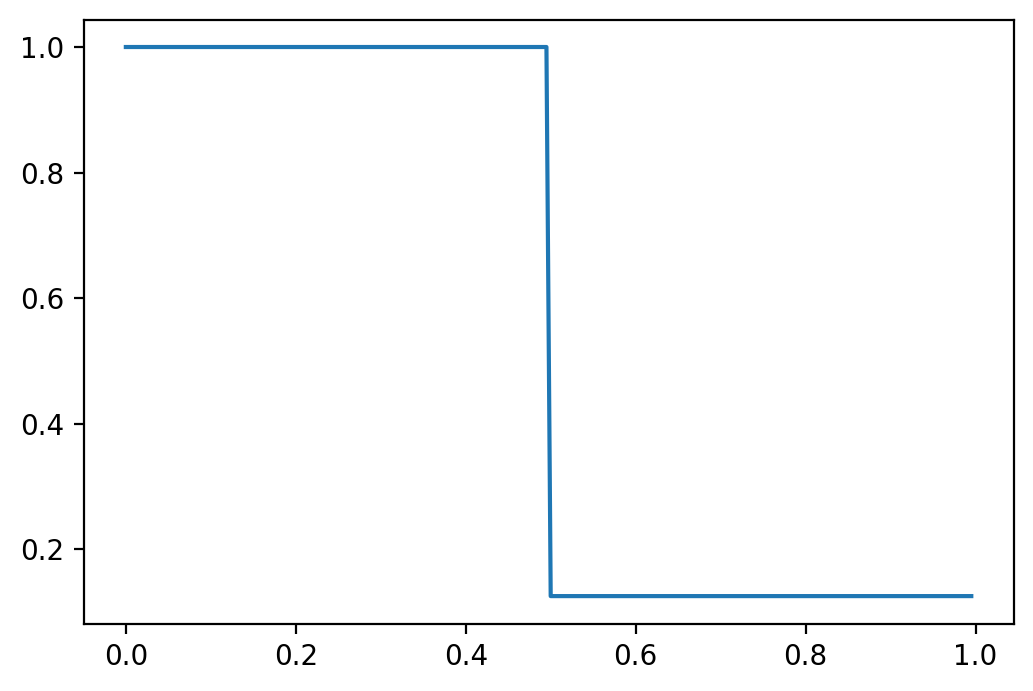

In [9]:
#Plot of initial setup
plt.plot(np.arange(a, b, dx(a, b, run_N)),initial(a, b, run_N, q_function(w_1, gamma), q_function(w_2, gamma), shock_loc)[:,0])

In [10]:
Ns=[20,100,1000,10000]
densities=[]
x_velocities=[]
for i in range(len(Ns)):
    densities.append(np.zeros(Ns[i]))
    x_velocities.append(np.zeros(Ns[i]))
    q=run(Ns[i], a, b, shock_loc, gamma, w_1, w_2, t_max)
    densities[i]=q[:,0]
    x_velocities[i]=q[:,1]


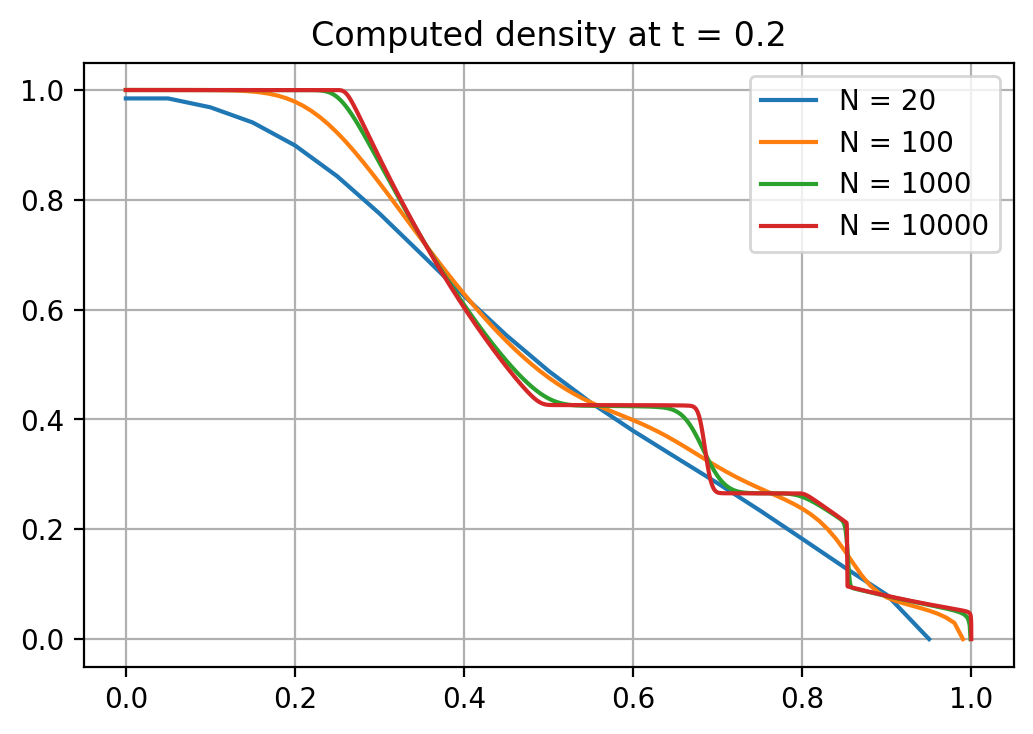

In [11]:
for i in range(len(Ns)):
    plt.plot(np.arange(a, b, dx(a, b, Ns[i])), densities[i],label="N = "+str(Ns[i]))
plt.title("Computed density at t = "+str(t_max))
plt.legend()
plt.grid()
plt.savefig("plots/density.png",dpi=300,bbox_inches="tight")

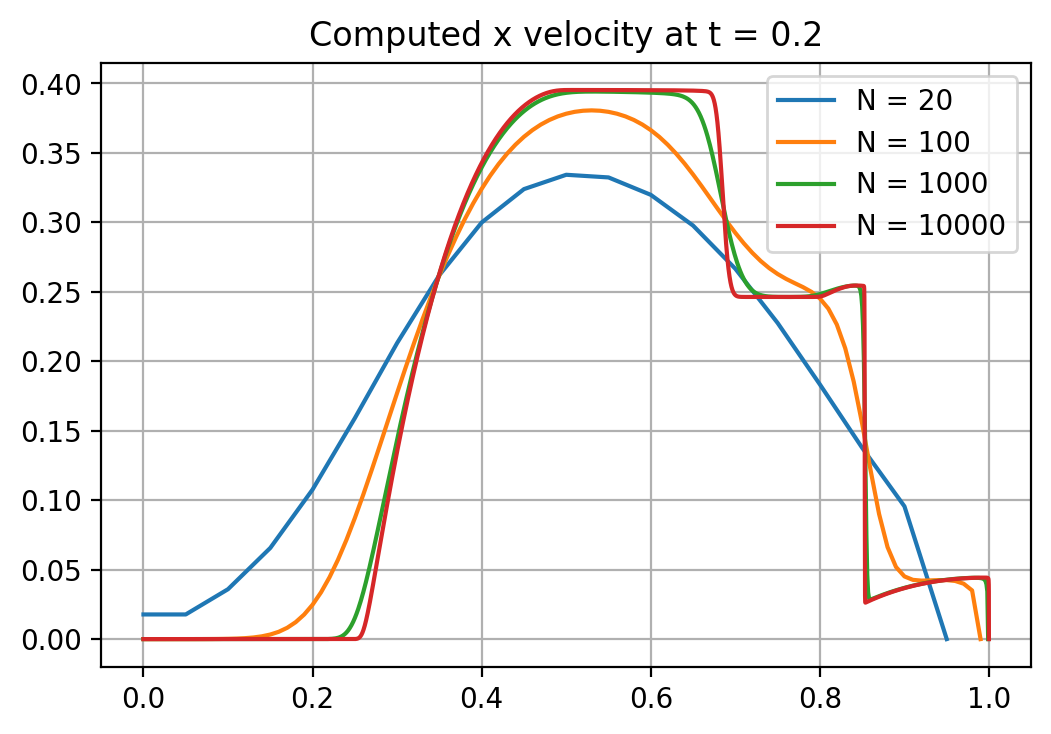

In [12]:
#x-velocity plot
for i in range(len(Ns)):
    plt.plot(np.arange(a, b, dx(a, b, Ns[i])), x_velocities[i],label="N = "+str(Ns[i]))
plt.title("Computed x velocity at t = "+str(t_max))
plt.legend()
plt.grid()
plt.savefig("plots/x_velocity.png",dpi=300,bbox_inches="tight")